In [1]:
import numpy as np 
import pandas as pd  
import re  
import nltk
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
from pymystem3 import Mystem
from wordcloud import WordCloud  
from datetime import datetime
from PIL import Image

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()
m = Mystem()

In [18]:
stopwhile = 0
print()
print('Enter the folder name')

while stopwhile != 1:
    path = input()

    try:
        path = path.replace('\\', '/') + '/'
        print('Working folder:', path)

        stopwhile = 1
    except: 
        print('Error in entering the working folder name')


Enter the folder name
Working folder: C:/Users/v.kozlovskiy/Desktop/DATAS/from_aug24/_ekklesiat_wc_and_other/to_git/


In [19]:
stopwhile = 0
print()
print('Enter the file name in the folder:', path)

while stopwhile != 1:
    filename = input()
    try:
        f = open(path + filename, 'r', encoding='utf8')
        text = f.read()  
        text
        stopwhile = 1
    except: 
        print('Error in entering the file name')


Enter the file name in the folder: C:/Users/v.kozlovskiy/Desktop/DATAS/from_aug24/_ekklesiat_wc_and_other/to_git/


In [20]:
stopwhile = 0
print()
print('Enter the language of the text in the', path+filename)
print('0 - russian')
print('1 - english')

while stopwhile != 1:
    lang = int(input())
    try:
        if lang == 0:
            print('Language - russian')
            lang_str = 'rus'
            stopwhile = 1
        elif lang == 1:
            print('Language - english')
            lang_str = 'eng'
            stopwhile = 1
        else:
            print('wrong input')

    except: 
        print('Error in entering the language')


Enter the language of the text in the C:/Users/v.kozlovskiy/Desktop/DATAS/from_aug24/_ekklesiat_wc_and_other/to_git/ecclesiastes_rus.txt
0 - russian
1 - english
Language - russian


In [21]:
process = text

In [22]:
# text lower and split by separate strings
text_lower_by_sent = process.lower().split('\n')
text_lower_by_sent[:5]

['\ufeff1:1 слова екклесиаста, сына давидова, царя в иерусалиме.',
 '1:2 суета сует, сказал екклесиаст, суета сует,- всё суета!',
 '1:3 что пользы человеку от всех трудов его, которыми трудится он под солнцем?',
 '1:4 род проходит, и род приходит, а земля пребывает во веки.',
 '1:5 восходит солнце, и заходит солнце, и спешит к месту своему, где оно восходит.']

In [23]:
# function for text filtration and lemmatization
def filtration(text, lang):
  if lang == 0:
      text = ''.join(m.lemmatize(text))
      text = re.sub(r'[^а-я\']', ' ', text)
  else:
      text = ''.join(lemmatizer.lemmatize(text))
      text = re.sub(r'[^a-z\']', ' ', text)
  text = text.split()
  print('ok')
  return ' '.join(text)

In [24]:
%time
text_lower_by_sent_proc = [filtration(i, lang) for i in text_lower_by_sent]
text_lower_by_sent_proc[:5]

CPU times: total: 0 ns
Wall time: 0 ns
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


['слово екклесиаст сын давидова царь в иерусалим',
 'суета суета сказать екклесиаст суета суета все суета',
 'что польза человек от весь труд его который трудиться он под солнце',
 'род проходить и род приходить а земля пребывать во веко',
 'восходить солнце и заходить солнце и спешить к место свой где оно восходить']

In [25]:
# join lemmatized text for wordcloud
union = ' '.join(text_lower_by_sent_proc)
union

'слово екклесиаст сын давидова царь в иерусалим суета суета сказать екклесиаст суета суета все суета что польза человек от весь труд его который трудиться он под солнце род проходить и род приходить а земля пребывать во веко восходить солнце и заходить солнце и спешить к место свой где оно восходить идти ветер к юг и переходить к север кружиться кружиться на ход свой и возвращаться ветер на круг свой весь река течь в море но море не переполняться к тот место откуда река течь они возвращаться чтобы опять течь весь вещь в труд не мочь человек пересказывать все не насыщаться око зрение не наполняться ухо слушание что быть то и быть и что делаться то и быть делаться и нет ничто новый под солнце бывать нечто о чем говорить смотреть вот это новое но это быть уже в век бывший прежде мы нет память о прежний да и о то что быть не оставаться память у тот который быть после я екклесиаст быть царь над израиль в иерусалим и предавать я сердце мой то чтобы исследовать и испытывать мудрость все что д

In [26]:
# tokenziation for wordcloud
text_tokens = word_tokenize(union)
text_tokens[:5]

['слово', 'екклесиаст', 'сын', 'давидова', 'царь']

In [27]:
# add stopwords with extend
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'все', 'вс'])
english_stopwords = stopwords.words("english")

In [28]:
# clear stopwords
if lang == 0:
    text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
else:
    text_tokens = [token.strip() for token in text_tokens if token not in english_stopwords]
text_tokens[:5]

['слово', 'екклесиаст', 'сын', 'давидова', 'царь']

In [29]:
# final text_raw for wordcloud
text_raw = " ".join(text_tokens)
text_raw

'слово екклесиаст сын давидова царь иерусалим суета суета сказать екклесиаст суета суета суета польза человек весь труд который трудиться солнце род проходить род приходить земля пребывать веко восходить солнце заходить солнце спешить место свой оно восходить идти ветер юг переходить север кружиться кружиться ход свой возвращаться ветер круг свой весь река течь море море переполняться место откуда река течь возвращаться течь весь вещь труд мочь человек пересказывать насыщаться око зрение наполняться ухо слушание делаться делаться ничто новый солнце бывать нечто говорить смотреть новое век бывший прежде память прежний оставаться память который екклесиаст царь израиль иерусалим предавать сердце исследовать испытывать мудрость делаться небо тяжелый занятие давать бог сын человеческий упражняться немой видеть весь дело делаться солнце суета томление дух кривой мочь сделаться прямой считать говорить сердце возвеличиваться приобретать мудрость весь который прежде иерусалим сердце видеть мудр

In [30]:
time_now = str(datetime.now().day) + str(datetime.now().month) + str(datetime.now().year) + '_' + str(datetime.now().hour) + str(datetime.now().minute)

<function matplotlib.pyplot.show(close=None, block=None)>

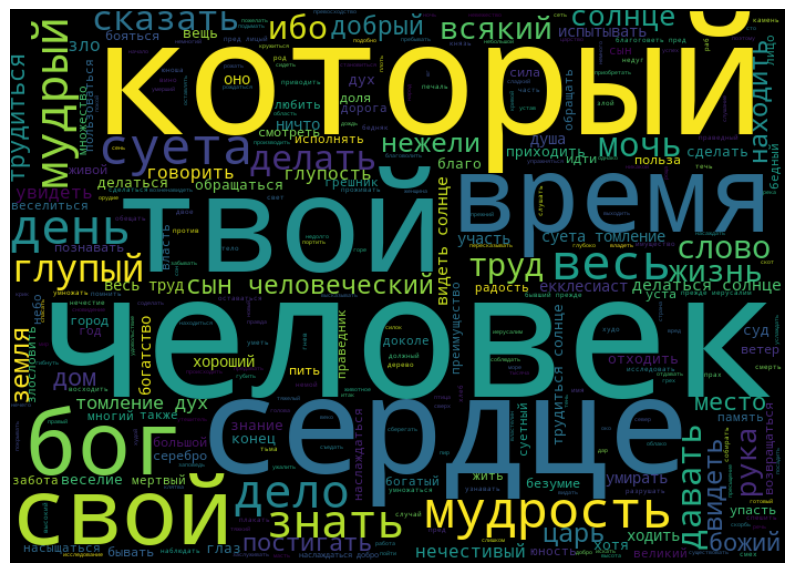

In [31]:
plt.figure(figsize=(10,10))
WC=WordCloud(width=700,height=500, max_words=300, min_font_size=5)
cloud=WC.generate(text_raw)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path + 'wc_' + lang_str + '_' + time_now + '.jpg')
plt.show